In [1]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
actions = [
    'rewind',
    'advance',
    'stop',
    'OK'
]

data = np.loadtxt('dataset/data_1648573431.csv', delimiter=',', dtype=np.float32)
data.shape

(8564, 45, 100)

In [3]:
x_data = data[:, :-1]
labels = data[:,  -1]
print(x_data.shape)
print(labels.shape)

(8564, 45, 99)
(8564,)


In [4]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(8564, 3)

In [5]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.12, random_state=2022)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(7536, 45, 99) (7536, 3)
(1028, 45, 99) (1028, 3)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    Dense(64, activation='relu', input_shape = x_train.shape[1:2]),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                41984     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
Total params: 44,163
Trainable params: 44,163
Non-trainable params: 0
_________________________________________________________________


In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import time
created_time = int(time.time())
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=1000,
    callbacks=[
        ModelCheckpoint('models/model_{created_time}.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/1000
236/236 [==============================] - 12s 43ms/step - loss: 24.0910 - acc: 0.4074 - val_loss: 7.5797 - val_acc: 0.4358

Epoch 00001: val_acc improved from -inf to 0.43580, saving model to models\gesture.h5
Epoch 2/1000
236/236 [==============================] - 8s 34ms/step - loss: 6.9324 - acc: 0.4820 - val_loss: 6.4111 - val_acc: 0.5068

Epoch 00002: val_acc improved from 0.43580 to 0.50681, saving model to models\gesture.h5
Epoch 3/1000
236/236 [==============================] - 8s 36ms/step - loss: 36.1899 - acc: 0.4624 - val_loss: 95.0077 - val_acc: 0.3901

Epoch 00003: val_acc did not improve from 0.50681
Epoch 4/1000
236/236 [==============================] - 7s 32ms/step - loss: 97.9491 - acc: 0.4943 - val_loss: 10.7075 - val_acc: 0.5233

Epoch 00004: val_acc improved from 0.50681 to 0.52335, saving model to models\gesture.h5
Epoch 5/1000
236/236 [==============================] - 8s 32ms/step - loss: 670.9191 - acc: 0.3877 - val_loss: 58.9680 - val_acc: 0.337

236/236 [==============================] - 5s 22ms/step - loss: 16.3735 - acc: 0.5426 - val_loss: 36.9240 - val_acc: 0.4329

Epoch 00042: val_acc did not improve from 0.64786
Epoch 43/1000
236/236 [==============================] - 5s 22ms/step - loss: 15.0380 - acc: 0.5362 - val_loss: 36.0296 - val_acc: 0.3580

Epoch 00043: val_acc did not improve from 0.64786
Epoch 44/1000
236/236 [==============================] - 5s 21ms/step - loss: 17.9008 - acc: 0.5395 - val_loss: 23.5212 - val_acc: 0.4543

Epoch 00044: val_acc did not improve from 0.64786
Epoch 45/1000
236/236 [==============================] - 5s 22ms/step - loss: 16.3971 - acc: 0.5482 - val_loss: 14.5431 - val_acc: 0.5165

Epoch 00045: val_acc did not improve from 0.64786
Epoch 46/1000
236/236 [==============================] - 7s 31ms/step - loss: 14.2439 - acc: 0.5638 - val_loss: 8.0887 - val_acc: 0.5593

Epoch 00046: val_acc did not improve from 0.64786
Epoch 47/1000
236/236 [==============================] - 7s 31ms/step 

236/236 [==============================] - 9s 36ms/step - loss: 3.3072 - acc: 0.5669 - val_loss: 3.3065 - val_acc: 0.5681

Epoch 00085: val_acc did not improve from 0.68774
Epoch 86/1000
236/236 [==============================] - 8s 33ms/step - loss: 2.1925 - acc: 0.6287 - val_loss: 1.9487 - val_acc: 0.5837

Epoch 00086: val_acc did not improve from 0.68774
Epoch 87/1000
236/236 [==============================] - 8s 32ms/step - loss: 1.6414 - acc: 0.6482 - val_loss: 1.3474 - val_acc: 0.6498

Epoch 00087: val_acc did not improve from 0.68774
Epoch 88/1000
236/236 [==============================] - 7s 28ms/step - loss: 1.4518 - acc: 0.6456 - val_loss: 1.2922 - val_acc: 0.6984

Epoch 00088: val_acc improved from 0.68774 to 0.69844, saving model to models\gesture.h5
Epoch 89/1000
236/236 [==============================] - 7s 31ms/step - loss: 1.2916 - acc: 0.6602 - val_loss: 1.8258 - val_acc: 0.5496

Epoch 00089: val_acc did not improve from 0.69844
Epoch 90/1000
236/236 [=================

236/236 [==============================] - 7s 29ms/step - loss: 1.1915 - acc: 0.6241 - val_loss: 1.5158 - val_acc: 0.7043

Epoch 00127: val_acc did not improve from 0.75778
Epoch 128/1000
236/236 [==============================] - 8s 33ms/step - loss: 1.5626 - acc: 0.6123 - val_loss: 3.0674 - val_acc: 0.5185

Epoch 00128: val_acc did not improve from 0.75778
Epoch 129/1000
236/236 [==============================] - 7s 30ms/step - loss: 1.2073 - acc: 0.6417 - val_loss: 1.2776 - val_acc: 0.6187

Epoch 00129: val_acc did not improve from 0.75778
Epoch 130/1000
236/236 [==============================] - 7s 31ms/step - loss: 0.9124 - acc: 0.6604 - val_loss: 2.4118 - val_acc: 0.4815

Epoch 00130: val_acc did not improve from 0.75778
Epoch 131/1000
236/236 [==============================] - 6s 27ms/step - loss: 1.3757 - acc: 0.6397 - val_loss: 0.7255 - val_acc: 0.6420

Epoch 00131: val_acc did not improve from 0.75778
Epoch 132/1000
236/236 [==============================] - 7s 29ms/step - lo

236/236 [==============================] - 7s 31ms/step - loss: 0.7438 - acc: 0.7262 - val_loss: 0.5650 - val_acc: 0.7364

Epoch 00170: val_acc did not improve from 0.78307
Epoch 171/1000
236/236 [==============================] - 7s 30ms/step - loss: 0.5854 - acc: 0.7580 - val_loss: 0.6852 - val_acc: 0.6381

Epoch 00171: val_acc did not improve from 0.78307
Epoch 172/1000
236/236 [==============================] - 7s 31ms/step - loss: 0.5517 - acc: 0.7545 - val_loss: 0.5963 - val_acc: 0.7471

Epoch 00172: val_acc did not improve from 0.78307
Epoch 173/1000
236/236 [==============================] - 7s 32ms/step - loss: 0.6177 - acc: 0.7614 - val_loss: 0.7026 - val_acc: 0.7607

Epoch 00173: val_acc did not improve from 0.78307
Epoch 174/1000
236/236 [==============================] - 8s 32ms/step - loss: 0.5371 - acc: 0.7695 - val_loss: 0.6690 - val_acc: 0.6459

Epoch 00174: val_acc did not improve from 0.78307
Epoch 175/1000
236/236 [==============================] - 8s 33ms/step - lo

236/236 [==============================] - 7s 30ms/step - loss: 0.0406 - acc: 0.9862 - val_loss: 0.2170 - val_acc: 0.9484

Epoch 00211: val_acc did not improve from 0.98346
Epoch 212/1000
236/236 [==============================] - 7s 31ms/step - loss: 0.0840 - acc: 0.9700 - val_loss: 0.0408 - val_acc: 0.9815

Epoch 00212: val_acc did not improve from 0.98346
Epoch 213/1000
236/236 [==============================] - 7s 30ms/step - loss: 0.0421 - acc: 0.9846 - val_loss: 0.0854 - val_acc: 0.9708

Epoch 00213: val_acc did not improve from 0.98346
Epoch 214/1000
236/236 [==============================] - 8s 33ms/step - loss: 0.0446 - acc: 0.9829 - val_loss: 0.0429 - val_acc: 0.9844

Epoch 00214: val_acc improved from 0.98346 to 0.98444, saving model to models\gesture.h5
Epoch 215/1000
236/236 [==============================] - 7s 31ms/step - loss: 0.0563 - acc: 0.9790 - val_loss: 0.0380 - val_acc: 0.9864

Epoch 00215: val_acc improved from 0.98444 to 0.98638, saving model to models\gesture.

236/236 [==============================] - 6s 24ms/step - loss: 0.4503 - acc: 0.7760 - val_loss: 0.4253 - val_acc: 0.7685

Epoch 00253: val_acc did not improve from 0.99514
Epoch 254/1000
236/236 [==============================] - 5s 22ms/step - loss: 0.4462 - acc: 0.7761 - val_loss: 0.4761 - val_acc: 0.7782

Epoch 00254: val_acc did not improve from 0.99514
Epoch 255/1000
236/236 [==============================] - 6s 25ms/step - loss: 0.6135 - acc: 0.7245 - val_loss: 0.6551 - val_acc: 0.6654

Epoch 00255: val_acc did not improve from 0.99514
Epoch 256/1000
236/236 [==============================] - 5s 21ms/step - loss: 0.5959 - acc: 0.7197 - val_loss: 0.5275 - val_acc: 0.7111

Epoch 00256: val_acc did not improve from 0.99514
Epoch 257/1000
236/236 [==============================] - 5s 22ms/step - loss: 0.5213 - acc: 0.7326 - val_loss: 0.4915 - val_acc: 0.7276

Epoch 00257: val_acc did not improve from 0.99514
Epoch 258/1000
236/236 [==============================] - 5s 21ms/step - lo

236/236 [==============================] - 7s 31ms/step - loss: 3.1524 - acc: 0.8373 - val_loss: 0.3730 - val_acc: 0.8531

Epoch 00296: val_acc did not improve from 0.99514
Epoch 297/1000
236/236 [==============================] - 8s 34ms/step - loss: 0.3591 - acc: 0.8544 - val_loss: 0.3581 - val_acc: 0.8521

Epoch 00297: val_acc did not improve from 0.99514
Epoch 298/1000
236/236 [==============================] - 10s 40ms/step - loss: 0.3391 - acc: 0.8609 - val_loss: 0.3513 - val_acc: 0.8512

Epoch 00298: val_acc did not improve from 0.99514
Epoch 299/1000
236/236 [==============================] - 8s 36ms/step - loss: 0.3231 - acc: 0.8665 - val_loss: 0.3041 - val_acc: 0.8638

Epoch 00299: val_acc did not improve from 0.99514
Epoch 300/1000
236/236 [==============================] - 8s 33ms/step - loss: 0.3087 - acc: 0.8746 - val_loss: 0.2903 - val_acc: 0.8755

Epoch 00300: val_acc did not improve from 0.99514
Epoch 301/1000
236/236 [==============================] - 11s 45ms/step - 

236/236 [==============================] - 7s 32ms/step - loss: 0.1623 - acc: 0.9400 - val_loss: 0.1907 - val_acc: 0.9368

Epoch 00339: val_acc did not improve from 0.99514
Epoch 340/1000
236/236 [==============================] - 7s 32ms/step - loss: 0.1598 - acc: 0.9384 - val_loss: 0.1659 - val_acc: 0.9407

Epoch 00340: val_acc did not improve from 0.99514
Epoch 341/1000
236/236 [==============================] - 7s 31ms/step - loss: 0.1528 - acc: 0.9404 - val_loss: 0.1608 - val_acc: 0.9455

Epoch 00341: val_acc did not improve from 0.99514
Epoch 342/1000
236/236 [==============================] - 7s 32ms/step - loss: 0.1398 - acc: 0.9455 - val_loss: 0.1595 - val_acc: 0.9446

Epoch 00342: val_acc did not improve from 0.99514
Epoch 343/1000
236/236 [==============================] - 7s 30ms/step - loss: 0.1329 - acc: 0.9473 - val_loss: 0.1593 - val_acc: 0.9407

Epoch 00343: val_acc did not improve from 0.99514
Epoch 344/1000
236/236 [==============================] - 7s 30ms/step - lo

236/236 [==============================] - 7s 29ms/step - loss: 0.1350 - acc: 0.9494 - val_loss: 0.1725 - val_acc: 0.9339

Epoch 00382: val_acc did not improve from 0.99514
Epoch 383/1000
236/236 [==============================] - 7s 30ms/step - loss: 0.1310 - acc: 0.9493 - val_loss: 0.1830 - val_acc: 0.9339

Epoch 00383: val_acc did not improve from 0.99514
Epoch 384/1000
236/236 [==============================] - 7s 29ms/step - loss: 0.1257 - acc: 0.9512 - val_loss: 0.1669 - val_acc: 0.9339

Epoch 00384: val_acc did not improve from 0.99514
Epoch 385/1000
236/236 [==============================] - 7s 29ms/step - loss: 0.1266 - acc: 0.9512 - val_loss: 0.1599 - val_acc: 0.9377

Epoch 00385: val_acc did not improve from 0.99514
Epoch 386/1000
236/236 [==============================] - 7s 31ms/step - loss: 0.1242 - acc: 0.9504 - val_loss: 0.1830 - val_acc: 0.9329

Epoch 00386: val_acc did not improve from 0.99514
Epoch 387/1000
236/236 [==============================] - 7s 29ms/step - lo


Epoch 00425: val_acc did not improve from 0.99514
Epoch 426/1000
236/236 [==============================] - 7s 29ms/step - loss: 0.0561 - acc: 0.9789 - val_loss: 0.0948 - val_acc: 0.9689

Epoch 00426: val_acc did not improve from 0.99514
Epoch 427/1000
236/236 [==============================] - 6s 27ms/step - loss: 0.0548 - acc: 0.9800 - val_loss: 0.0996 - val_acc: 0.9728

Epoch 00427: val_acc did not improve from 0.99514
Epoch 428/1000
236/236 [==============================] - 7s 30ms/step - loss: 0.0536 - acc: 0.9785 - val_loss: 0.1004 - val_acc: 0.9689

Epoch 00428: val_acc did not improve from 0.99514
Epoch 429/1000
236/236 [==============================] - 7s 30ms/step - loss: 0.0627 - acc: 0.9780 - val_loss: 0.0949 - val_acc: 0.9747

Epoch 00429: val_acc did not improve from 0.99514
Epoch 430/1000
236/236 [==============================] - 7s 31ms/step - loss: 0.0529 - acc: 0.9813 - val_loss: 0.0873 - val_acc: 0.9767

Epoch 00430: val_acc did not improve from 0.99514
Epoch 431

236/236 [==============================] - 7s 31ms/step - loss: 0.0315 - acc: 0.9893 - val_loss: 0.0809 - val_acc: 0.9796

Epoch 00469: val_acc did not improve from 0.99514
Epoch 470/1000
236/236 [==============================] - 7s 30ms/step - loss: 0.0206 - acc: 0.9932 - val_loss: 0.0820 - val_acc: 0.9796

Epoch 00470: val_acc did not improve from 0.99514
Epoch 471/1000
236/236 [==============================] - 7s 30ms/step - loss: 0.0157 - acc: 0.9956 - val_loss: 0.0871 - val_acc: 0.9796

Epoch 00471: val_acc did not improve from 0.99514
Epoch 472/1000
236/236 [==============================] - 7s 29ms/step - loss: 0.0245 - acc: 0.9924 - val_loss: 0.0604 - val_acc: 0.9844

Epoch 00472: val_acc did not improve from 0.99514
Epoch 473/1000
236/236 [==============================] - 7s 29ms/step - loss: 0.0234 - acc: 0.9934 - val_loss: 0.0641 - val_acc: 0.9854

Epoch 00473: val_acc did not improve from 0.99514
Epoch 474/1000
236/236 [==============================] - 7s 31ms/step - lo

236/236 [==============================] - 7s 30ms/step - loss: 0.0063 - acc: 0.9988 - val_loss: 0.0707 - val_acc: 0.9874

Epoch 00512: val_acc did not improve from 0.99514
Epoch 513/1000
236/236 [==============================] - 8s 35ms/step - loss: 0.0064 - acc: 0.9988 - val_loss: 0.0735 - val_acc: 0.9874

Epoch 00513: val_acc did not improve from 0.99514
Epoch 514/1000
236/236 [==============================] - 7s 30ms/step - loss: 0.0056 - acc: 0.9991 - val_loss: 0.0771 - val_acc: 0.9854

Epoch 00514: val_acc did not improve from 0.99514
Epoch 515/1000
236/236 [==============================] - 8s 32ms/step - loss: 0.0058 - acc: 0.9991 - val_loss: 0.0798 - val_acc: 0.9874

Epoch 00515: val_acc did not improve from 0.99514
Epoch 516/1000
236/236 [==============================] - 7s 31ms/step - loss: 0.0057 - acc: 0.9988 - val_loss: 0.0778 - val_acc: 0.9864

Epoch 00516: val_acc did not improve from 0.99514
Epoch 517/1000
236/236 [==============================] - 8s 33ms/step - lo

236/236 [==============================] - 8s 32ms/step - loss: 0.0036 - acc: 0.9992 - val_loss: 0.0934 - val_acc: 0.9864

Epoch 00555: val_acc did not improve from 0.99514
Epoch 556/1000
236/236 [==============================] - 8s 33ms/step - loss: 0.0033 - acc: 0.9995 - val_loss: 0.0829 - val_acc: 0.9883

Epoch 00556: val_acc did not improve from 0.99514
Epoch 557/1000
236/236 [==============================] - 7s 31ms/step - loss: 0.0041 - acc: 0.9996 - val_loss: 0.0831 - val_acc: 0.9893

Epoch 00557: val_acc did not improve from 0.99514
Epoch 558/1000
236/236 [==============================] - 8s 35ms/step - loss: 0.0031 - acc: 0.9996 - val_loss: 0.0829 - val_acc: 0.9903

Epoch 00558: val_acc did not improve from 0.99514
Epoch 559/1000
236/236 [==============================] - 8s 32ms/step - loss: 0.0029 - acc: 0.9996 - val_loss: 0.0836 - val_acc: 0.9893

Epoch 00559: val_acc did not improve from 0.99514
Epoch 560/1000
236/236 [==============================] - 8s 35ms/step - lo

236/236 [==============================] - 7s 31ms/step - loss: 0.0017 - acc: 0.9999 - val_loss: 0.0919 - val_acc: 0.9883

Epoch 00598: val_acc did not improve from 0.99514
Epoch 599/1000
236/236 [==============================] - 7s 31ms/step - loss: 0.0017 - acc: 0.9999 - val_loss: 0.0954 - val_acc: 0.9883

Epoch 00599: val_acc did not improve from 0.99514
Epoch 600/1000
236/236 [==============================] - 8s 33ms/step - loss: 0.0017 - acc: 0.9999 - val_loss: 0.0962 - val_acc: 0.9883

Epoch 00600: val_acc did not improve from 0.99514
Epoch 601/1000
236/236 [==============================] - 7s 30ms/step - loss: 0.0017 - acc: 0.9999 - val_loss: 0.0982 - val_acc: 0.9883

Epoch 00601: val_acc did not improve from 0.99514
Epoch 602/1000
236/236 [==============================] - 8s 33ms/step - loss: 0.0016 - acc: 0.9999 - val_loss: 0.1061 - val_acc: 0.9844

Epoch 00602: val_acc did not improve from 0.99514
Epoch 603/1000
236/236 [==============================] - 8s 32ms/step - lo

236/236 [==============================] - 7s 31ms/step - loss: 9.0343e-04 - acc: 1.0000 - val_loss: 0.1061 - val_acc: 0.9893

Epoch 00641: val_acc did not improve from 0.99514
Epoch 642/1000
236/236 [==============================] - 7s 29ms/step - loss: 9.1981e-04 - acc: 1.0000 - val_loss: 0.1064 - val_acc: 0.9893

Epoch 00642: val_acc did not improve from 0.99514
Epoch 643/1000
236/236 [==============================] - 7s 32ms/step - loss: 9.0807e-04 - acc: 1.0000 - val_loss: 0.1063 - val_acc: 0.9893

Epoch 00643: val_acc did not improve from 0.99514
Epoch 644/1000
236/236 [==============================] - 7s 29ms/step - loss: 9.0477e-04 - acc: 1.0000 - val_loss: 0.1064 - val_acc: 0.9893

Epoch 00644: val_acc did not improve from 0.99514
Epoch 645/1000
236/236 [==============================] - 7s 30ms/step - loss: 8.9504e-04 - acc: 1.0000 - val_loss: 0.1067 - val_acc: 0.9893

Epoch 00645: val_acc did not improve from 0.99514
Epoch 646/1000
236/236 [==============================]

236/236 [==============================] - 8s 33ms/step - loss: 6.5435e-04 - acc: 1.0000 - val_loss: 0.1061 - val_acc: 0.9903

Epoch 00683: val_acc did not improve from 0.99514
Epoch 684/1000
236/236 [==============================] - 9s 36ms/step - loss: 6.4961e-04 - acc: 1.0000 - val_loss: 0.1064 - val_acc: 0.9903

Epoch 00684: val_acc did not improve from 0.99514
Epoch 685/1000
236/236 [==============================] - 11s 46ms/step - loss: 6.4466e-04 - acc: 1.0000 - val_loss: 0.1066 - val_acc: 0.9912

Epoch 00685: val_acc did not improve from 0.99514
Epoch 686/1000
236/236 [==============================] - 8s 33ms/step - loss: 6.4701e-04 - acc: 1.0000 - val_loss: 0.1066 - val_acc: 0.9903

Epoch 00686: val_acc did not improve from 0.99514
Epoch 687/1000
236/236 [==============================] - 8s 33ms/step - loss: 6.3917e-04 - acc: 1.0000 - val_loss: 0.1068 - val_acc: 0.9903

Epoch 00687: val_acc did not improve from 0.99514
Epoch 688/1000
236/236 [==============================

236/236 [==============================] - 5s 21ms/step - loss: 5.4326e-04 - acc: 1.0000 - val_loss: 0.1163 - val_acc: 0.9893

Epoch 00726: val_acc did not improve from 0.99514
Epoch 727/1000
236/236 [==============================] - 5s 20ms/step - loss: 5.4284e-04 - acc: 1.0000 - val_loss: 0.1168 - val_acc: 0.9893

Epoch 00727: val_acc did not improve from 0.99514
Epoch 728/1000
236/236 [==============================] - 5s 23ms/step - loss: 5.3726e-04 - acc: 1.0000 - val_loss: 0.1171 - val_acc: 0.9893

Epoch 00728: val_acc did not improve from 0.99514
Epoch 729/1000
236/236 [==============================] - 7s 28ms/step - loss: 5.3561e-04 - acc: 1.0000 - val_loss: 0.1174 - val_acc: 0.9893

Epoch 00729: val_acc did not improve from 0.99514
Epoch 730/1000
236/236 [==============================] - 7s 28ms/step - loss: 5.3292e-04 - acc: 1.0000 - val_loss: 0.1176 - val_acc: 0.9893

Epoch 00730: val_acc did not improve from 0.99514
Epoch 731/1000
236/236 [==============================]

236/236 [==============================] - 7s 30ms/step - loss: 4.7880e-04 - acc: 1.0000 - val_loss: 0.1206 - val_acc: 0.9883

Epoch 00768: val_acc did not improve from 0.99514
Epoch 769/1000
236/236 [==============================] - 7s 29ms/step - loss: 4.7550e-04 - acc: 1.0000 - val_loss: 0.1207 - val_acc: 0.9883

Epoch 00769: val_acc did not improve from 0.99514
Epoch 770/1000
236/236 [==============================] - 7s 29ms/step - loss: 4.7415e-04 - acc: 1.0000 - val_loss: 0.1207 - val_acc: 0.9883

Epoch 00770: val_acc did not improve from 0.99514
Epoch 771/1000
236/236 [==============================] - 6s 26ms/step - loss: 4.7245e-04 - acc: 1.0000 - val_loss: 0.1208 - val_acc: 0.9883

Epoch 00771: val_acc did not improve from 0.99514
Epoch 772/1000
236/236 [==============================] - 7s 30ms/step - loss: 4.7089e-04 - acc: 1.0000 - val_loss: 0.1209 - val_acc: 0.9883

Epoch 00772: val_acc did not improve from 0.99514
Epoch 773/1000
236/236 [==============================]

236/236 [==============================] - 5s 20ms/step - loss: 4.4104e-04 - acc: 1.0000 - val_loss: 0.1231 - val_acc: 0.9883

Epoch 00810: val_acc did not improve from 0.99514
Epoch 811/1000
236/236 [==============================] - 5s 21ms/step - loss: 4.3963e-04 - acc: 1.0000 - val_loss: 0.1231 - val_acc: 0.9883

Epoch 00811: val_acc did not improve from 0.99514
Epoch 812/1000
236/236 [==============================] - 5s 22ms/step - loss: 4.3951e-04 - acc: 1.0000 - val_loss: 0.1231 - val_acc: 0.9883

Epoch 00812: val_acc did not improve from 0.99514
Epoch 813/1000
236/236 [==============================] - 5s 22ms/step - loss: 4.3997e-04 - acc: 1.0000 - val_loss: 0.1232 - val_acc: 0.9883

Epoch 00813: val_acc did not improve from 0.99514
Epoch 814/1000
236/236 [==============================] - 5s 20ms/step - loss: 4.3936e-04 - acc: 1.0000 - val_loss: 0.1232 - val_acc: 0.9883

Epoch 00814: val_acc did not improve from 0.99514
Epoch 815/1000
236/236 [==============================]

236/236 [==============================] - 7s 31ms/step - loss: 4.2217e-04 - acc: 1.0000 - val_loss: 0.1246 - val_acc: 0.9883

Epoch 00852: val_acc did not improve from 0.99514
Epoch 853/1000
236/236 [==============================] - 6s 27ms/step - loss: 4.2188e-04 - acc: 1.0000 - val_loss: 0.1246 - val_acc: 0.9883

Epoch 00853: val_acc did not improve from 0.99514
Epoch 854/1000
236/236 [==============================] - 7s 28ms/step - loss: 4.2165e-04 - acc: 1.0000 - val_loss: 0.1245 - val_acc: 0.9883

Epoch 00854: val_acc did not improve from 0.99514
Epoch 855/1000
236/236 [==============================] - 7s 29ms/step - loss: 4.2173e-04 - acc: 1.0000 - val_loss: 0.1247 - val_acc: 0.9883

Epoch 00855: val_acc did not improve from 0.99514
Epoch 856/1000
236/236 [==============================] - 7s 32ms/step - loss: 4.2112e-04 - acc: 1.0000 - val_loss: 0.1247 - val_acc: 0.9883

Epoch 00856: val_acc did not improve from 0.99514
Epoch 857/1000
236/236 [==============================]

236/236 [==============================] - 8s 34ms/step - loss: 4.1229e-04 - acc: 1.0000 - val_loss: 0.1256 - val_acc: 0.9883

Epoch 00894: val_acc did not improve from 0.99514
Epoch 895/1000
236/236 [==============================] - 8s 33ms/step - loss: 4.1218e-04 - acc: 1.0000 - val_loss: 0.1257 - val_acc: 0.9883

Epoch 00895: val_acc did not improve from 0.99514
Epoch 896/1000
236/236 [==============================] - 8s 32ms/step - loss: 4.1198e-04 - acc: 1.0000 - val_loss: 0.1257 - val_acc: 0.9874

Epoch 00896: val_acc did not improve from 0.99514
Epoch 897/1000
236/236 [==============================] - 7s 30ms/step - loss: 4.1171e-04 - acc: 1.0000 - val_loss: 0.1258 - val_acc: 0.9874

Epoch 00897: val_acc did not improve from 0.99514
Epoch 898/1000
236/236 [==============================] - 8s 32ms/step - loss: 4.1164e-04 - acc: 1.0000 - val_loss: 0.1258 - val_acc: 0.9874

Epoch 00898: val_acc did not improve from 0.99514
Epoch 899/1000
236/236 [==============================]

236/236 [==============================] - 7s 31ms/step - loss: 4.0675e-04 - acc: 1.0000 - val_loss: 0.1263 - val_acc: 0.9874

Epoch 00936: val_acc did not improve from 0.99514
Epoch 937/1000
236/236 [==============================] - 8s 33ms/step - loss: 4.0673e-04 - acc: 1.0000 - val_loss: 0.1264 - val_acc: 0.9874

Epoch 00937: val_acc did not improve from 0.99514
Epoch 938/1000
236/236 [==============================] - 8s 33ms/step - loss: 4.0667e-04 - acc: 1.0000 - val_loss: 0.1264 - val_acc: 0.9874

Epoch 00938: val_acc did not improve from 0.99514
Epoch 939/1000
236/236 [==============================] - 8s 33ms/step - loss: 4.0649e-04 - acc: 1.0000 - val_loss: 0.1264 - val_acc: 0.9874

Epoch 00939: val_acc did not improve from 0.99514
Epoch 940/1000
236/236 [==============================] - 7s 31ms/step - loss: 4.0652e-04 - acc: 1.0000 - val_loss: 0.1264 - val_acc: 0.9874

Epoch 00940: val_acc did not improve from 0.99514
Epoch 941/1000
236/236 [==============================]


Epoch 00978: val_acc did not improve from 0.99514
Epoch 979/1000
236/236 [==============================] - 5s 23ms/step - loss: 4.0411e-04 - acc: 1.0000 - val_loss: 0.1266 - val_acc: 0.9874

Epoch 00979: val_acc did not improve from 0.99514
Epoch 980/1000
236/236 [==============================] - 5s 22ms/step - loss: 4.0407e-04 - acc: 1.0000 - val_loss: 0.1267 - val_acc: 0.9874

Epoch 00980: val_acc did not improve from 0.99514
Epoch 981/1000
236/236 [==============================] - 5s 23ms/step - loss: 4.0397e-04 - acc: 1.0000 - val_loss: 0.1267 - val_acc: 0.9874

Epoch 00981: val_acc did not improve from 0.99514

Epoch 00981: ReduceLROnPlateau reducing learning rate to 3.051757957450718e-08.
Epoch 982/1000
236/236 [==============================] - 5s 23ms/step - loss: 4.0373e-04 - acc: 1.0000 - val_loss: 0.1267 - val_acc: 0.9874

Epoch 00982: val_acc did not improve from 0.99514
Epoch 983/1000
236/236 [==============================] - 5s 22ms/step - loss: 4.0366e-04 - acc: 1.0

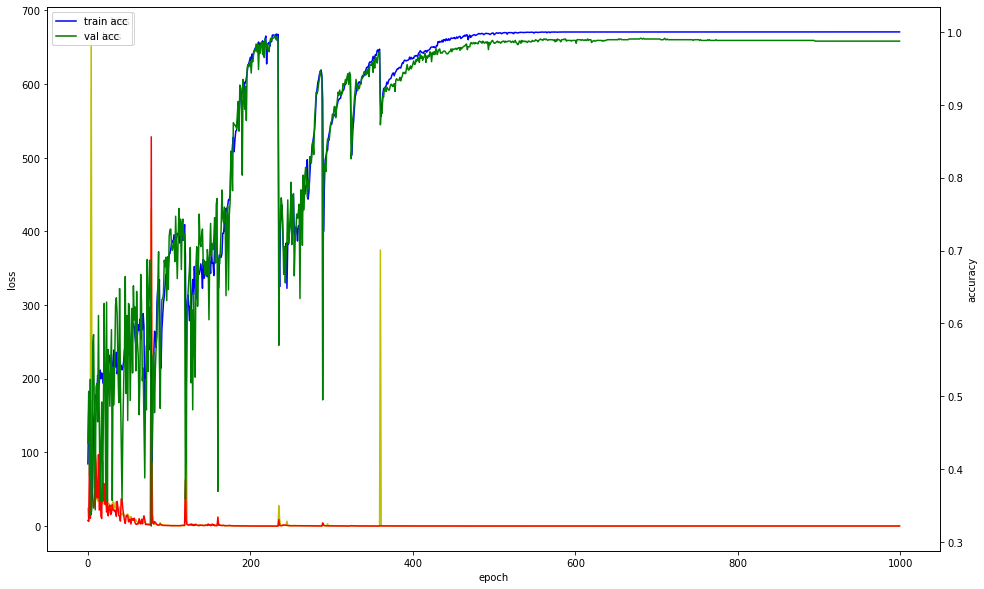

In [11]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

In [12]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model_1648573934.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[742,   0],
        [  5, 281]],

       [[649,   5],
        [  0, 374]],

       [[660,   0],
        [  0, 368]]], dtype=int64)